**Downloads**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf sample_data

In [ ]:
%%time
!pip install -U --quiet sentence-transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")

**Imports**

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 150)
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/drive/MyDrive/PFA/simaese_roberta.csv')
embeddings = np.load('/content/drive/MyDrive/PFA/sialese_embeddings.npy')

$$$$

**Utility Functions**

In [ ]:
def find_most_similar(new_sentence,embeddings=embeddings):
    new_embedding = model.encode(new_sentence)
    similarity = cosine_similarity([new_embedding],embeddings)

    id = np.argmax(similarity)
    sim = np.max(similarity)
    row = df[df['id'] == id]

    perso = row[['agreeableness', 'openness', 'conscientiousness',
       'extraversion', 'neuroticism']].values
    return row,sim,perso

def user_data(user):
    user_df = data[data['fullName'] == user]
    user_df = user_df[user_df['caption'].notna() & user_df['caption'].apply(lambda x: isinstance(x, str))]
    return user_df

$$$$

**Insta Data**

> Here's a general guide on how each MBTI dimension maps to the Big Five traits:

>  1. Extraversion (E) vs. Introversion (I):

  * `E` in MBTI correspond to `high` `Extraversion` in OCEAN.
  * `I` in MBTI correspond to `low` `Extraversion` in OCEAN.
    
>  2. Sensing (S) vs. Intuition (N):

  * `S` in MBTI correlate with `lower` `Openness` in OCEAN.
  * `N` in MBTI correlate with `higher` `Openness` in OCEAN.

>  3. Thinking (T) vs. Feeling (F):

  * `T` in MBTI correspond to `lower` `Agreeableness` in OCEAN.
  * `F` in MBTI correspond to `higher` `Agreeableness` in OCEAN.

>  4.Judging (J) vs. Perceiving (P):

  * `J` in MBTI correspond to `higher` `Conscientiousness` in OCEAN.
  * `P` in MBTI correspond to `lower` `Conscientiousness` in OCEAN.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PFA/final_data.csv')
data = data.drop_duplicates(subset='username', keep='first')

columns_order = ['username','post_captions','O', 'C', 'E', 'A','N']
new_column_names = {
    'post_captions': 'captions'
}
data = data[columns_order]
data = data.rename(columns=new_column_names)
data

,username,captions,O,C,E,A,N
0,sofia.sapiens,"['Don’t spoil it for those who haven’t read the whole thing 🤫', 'Scroll past if you won’t stay till the end 👀\n\nBeing lazy is normal and is actua...",0,1,0,1,1
1,matiamubysofia,['From within \nThe within \nAs the without \nMerging \nInto \nThis moment now \n🍯\n\nAll the movement to arrive in this sweet space of openness &...,0,0,0,1,1
2,elliotbfit,['I’ve decided it’s time to do a little cut but not just for fat loss ⤵️ \n\nFor me doing a cut right now is actually more about sorting out bad h...,0,1,0,1,0
3,elliotgarnaut,"['I love celebrating loved ones with good wine, and DR3wines x sthugowines is the perfect pairing. DR3 Cabernet Sauvignon 2021 was the perfect dro...",0,1,1,0,0
4,elliotjamesreay,"['Tweedle Dee…💙 #ad amazonmusic falloutonprime', 'When you know my name is Reay…💔 #singing #reels #explore #ibelievetomysoul #raycharles #tiktokma...",1,0,0,1,0
...,...,...,...,...,...,...,...
530,theanthonyedwards_,"['Been grinding all my life for moments like this. #teambose', 'Just in time. AE1 Low is now available in NBA 2K24! Believe That. \n\n#AE1 #Believ...",0,1,0,0,1
531,mr.6ways,"['It’s okay to weep when life feels overwhelming. Tears are a sign of strength, not weakness. But as you let the emotions flow, remember that this...",0,1,1,1,1
532,anthonygargiula,"['i had to be extra and add some riffs to this one lol 😅 #sing #singing #toosweet #hozier', 'i had the most amazing time in new york city with son...",0,1,1,0,1
533,theanthonyvicino,"['Opportunity or Obstacle is often simply a matter of perspective.', ""We built a 7-figure window washing business in under 12-months.\n\nTo start,...",0,1,0,1,1


**Multiple texts at once**

In [ ]:
user = 'matiamubysofia' #@param ['sofia.sapiens', 'matiamubysofia', 'elliotbfit', 'elliotgarnaut', 'elliotjamesreay', 'harvelliott', 'mrsbeccaelliott', 'elliotsloan', 'hubermanlab', 'andrewcodesmith', 'awilkinson', 'mengmengduck', 'andrewfreund', 'johntravolta', 'sophievandaniels', 'martinachivasso', 'janniksin', 'andreyrublev', 'mosalah', 'alexandrapark1', 'ryan_f_murphy', 'erika.fairweather', 'mayssaa_ghribi', 'alexlange', 'wroetoshaw', 'artchidiary', 'archieperkins__', 'oliverkahn', 'noahschnapp', 'harrywinks', 'elsiegossage', 'frank', 'jamie_lidell', 'carlnasman', 'senatorformica', 'matt_mcinnis', 'michaelrosen9000', 'sofiaguellaty', 'alexander', 'alex_caves', 'harryholland64', 'harryh0ward', 'joolsoliver', 'emilyhenrywrites', 'humminglion', 'henrygolding', 'maya_henry', 'henryrowleyy', '_sarahmhen', 'sophie_aris', 'sophiejaynemiller', 'sophiemoulds', 'sophieferiani', 'sophiet', 'sophiestanbury', 'soturg', 'thatgirlsophy', 'sophie__church', 'sophiechapman87', 'emily', 'emilydidonato', 'emilycanham', 'emilyanngemma', 'emilypayampss', 'emzchampion', 'emilyvartanian', 'hellomissjordan', 'emi.billings', 'emilyvelkovski', 'emilyrosdahl', '_emilysworld', 'emilyijackson', 'carlathursday', 'arnelbee', 'miabloomusic', 'emmalagerlow', 'jon.binnie', 'jaimeeleighcurtis', 'nourished.rebel', 'witchofwhitemagick', 'margofreemusic', 'odelle.maiala.ixaro', 'thesocialbolt', 'ajazchoudhary_', 'podcast.support.services', 'chimehousemedia', 'jenmcginlaycopywriter', 'belleverdiglione', 'katelynannaperios', 'iambrittanywilde', 'goldenbymareah', 'leahlivefree', 'squarepete', 'thegrizzlydude1', 'petermolinaa', 'latimerforny', 'janiseeaileen', 'jon_harmonic', 'jacquelinefransway', 'mariahs_chambers', 'eri_spndlr', 'ferryman_medic', 'sophiesuchan', 'sophiewyburd', 'emswells', 'thestemdiaries', 'jackblack', 'desiperkins', 'cmcoving', 'aliciakeys', 'kimikoglenn', 'harriismeg', 'kevindebruyne', 'edward_barber', 'elsie.mytryk', 'jakes_angelsss', 'gregoryrfz', 'ivyscloset_la', 'lilyjamesofficial', 'alexanderludwig', 'kaylee_mckeown', 'regansmith4', 'liron_yoga', 'harryjohnson92', 'noahschnacky', 'victorosimhen9', 'tillyramsay', 'ivylordrhodes', 'harrymaguire93', 'jamesolivercoaching', 'blondish', 'janayathefuture', 'bicky', 'philrypz', 'hugo.hilaire', 'tiffany_hugo_and_teddy', 'hugo_harrison', 'matthewbogart', 'wiktor', 'mariafrey', 'laurie_porr', 'jeremyflint', 'jgclarke', 'itsmgz', 'clzd.me', 'dale.am', 'davemcnally', 'emilywelchstyle', 'hummusbirrd', 'donte.colley', 'iambridgetkelly', 'giorgia.andriani22', 'alexandrapereira', 'juliarestoinroitfeld', 'chalmeta', 'kellypiquet', 'chandacarroll', 'mirthamichelle', 'unjadedjade', 'leilalevchenko', '_beatrips', 'emmaalexwatson1_', 'amelie.kaced', 'spam.with.cas', 'ms_siska_wijaya', 'hiker_therapy', 'andrea.gomezpaez16', 'strawberry_nymphat', 'sallyprosservoice', 'realtordlucas', 'penandpapergirl_wa', 'itskathryngrace', 'annmarielord_', 'tomhanks', 'zendaya', 'kristenmcatee', 'mallorypruitt', 'jillian.batt', 'joeygraceffa', 'milliebobbybrown', 'reynoldpoer', 'jennxpenn', 'lianajernigan', 'katemansi', 'jennaortega', 'rizahmed', 'missbessb', 'sofiaiesmaili', 'samosphillipos', 'kianlawley', 'shanedawson', 'elizabeth.filips', 'adamsandler', 'hellotinah', 'highdeekuan', 'heathhussar', 'adrienelouise', 'adrianbliss', 'rickydillon', 'annalenkovska', 'rylandadams', 'henrycavill', 'artist_lana_arkhi', 'kirstycarden', 'annavarga_yoga', 'tahliaswartz_naturopath', 'krishcamille.co', 'sammi_johnson_', 'shanpowell.doula', 'rosielockhart', 'thewanderingwolfsta', 'stripesnchanel', 'tanyaburr', 'thisisbrooklynn', 'nmillz', 'jonahranz', 'evanmillward', 'samwitdajuice', 'macneer', 'valoriewhitman', 'marioinspiration', '3stargeneral', 'veondremitchell', '_fredcleveland2', 'beckycrowley_', 'vivianmiller_', 'olivia.barash', 'realwithemma', 'christine.beaubrun', 'haileyffrazier', 'jayciesdiary', 'lifewithjazz', 'ramblinronjames', 'quenblackwell', 'damondominique', 'brandel_butler', 'susanhable', 'georgeferrier', 'petergrosz', 'tommy.camps', 'iam_karitab', 'blakegray', 'brandicarlile', 'andrewjmes', 'taykbell', 'daisychoiii', 'latricia_nicole', 'vuongdustin', 'manurios', 'seanfennessey', 'philippplein', 'missashaphilip', 'philip.sbrt', 'monicaroams', 'ryanphillippe', 'izabel.philippa', 'teganphillipa', 'philippklein', 'fernchisholm', 'schofe', 'philippabloom', 'phillipqvu', 'philipdeml', 'audreyrivet', 'audreyafs', 'audreyloques', 'audrey.leighton', 'audreyroloff', 'audreydiler', 'fourfeetnine', 'audboos', 'foodsofaudrey', 'thechrissyhazel', 'hazel_brady', 'thehazelhayes', 'hazelwoodx', 'freja_evelyn', 'evelynchengx', 'homewithevelyn', 'alessyafarrugiaa', 'amandaasad', 'arianagrande', 'ashleyseamour', 'averyywoods', 'theintrovertedfiddler', 'globeguide', 'nataliestrobll', '_nanasvision', 'deardiary', 'deardiary_kw', 'blogilates', 'kennyortegablog', 'strictlythriving', 'laurenjauregui', 'mariannewilliamson', 'ktrnapl', 'trillsammy', 'savhall', 'sammy_soso', 'punz', 'pokimanelol', 'rewerggg', 'samrascals_', 'valkyrae', 'ellum', 'nicewigg', 'basiilleafs', 'naileadevora', 'meltdowndotcom', 'beyonce', 'billieeilish', 'bukayosaka87', 'centralcee', 'declanrice', 'elainamich', 'erling.haaland', 'evange', 'henbu_', 'jackfalahee', 'jackgrealish', 'jamesarthur23', 'jlo', 'joe_sugg', 'justinbieber', 'laurenconrad', 'lifewithdrsabra', 'mrbeast', 'nikiivictoria', 'rihannaofficiall', 'sincerelyjules', 'taylorswift', 'teddysphotos', 'theweeknd', 'zachking', 'erinmayhenry', 'henrymoodie', 'reneeedg', 'dean_g82', 'cassyyms', 'carmcee', 'queenietaooo', 'phoebe.funai', 'laurenloveless', 'chunkz', 'courtnebianca', 'kiki.ransom', 'marygracetropeano', 'lilamoss', 'thtgrlreads', 'ericka_witha_ck', 'morganyasmin', 'abookwormwhobakes', 'findingphilothea', 'scott.thomas', 'thomasbrag', 'tjpower', 'jayden_ordner', 'cornonthecorb', 'martinadiarylane', 'johntermini', 'thomas', 'emma.thomas___', 'em.l.thomas', 'tomfrankly', 'thomasadoherty', 'thomasdajer', 'hilariabaldwin', 'gabrielleisgone', 'thomasgelms', 'tombarr247', 'simonthomastv', 'hannahthomas', 'briannawiest', 'bryanjohnson_', 'briannehowey', 'jessideoliveira', 'annaastrup', 'evameloche', 'mia_fernandez.s', 'zaraynaf', 'sabquesada', 'sharlenahassani', 'pilotswu', 'mlizmuller', 'lenanash', 'anjasarea', 'josh.larone', 'ga.shu', 'xoxotsumi', 'jessicaalba', 'chiaraking', 'madeleinecwhite', 'bryanboy', 'bitsofbri', 'iambriannathan', 'briannapastor', 'bryantwood', 'bchesky', 'brian_pruett', 'briandecosta', 'zuck', 'mark_rupp', 'anthonydjon', 'thosh.collins', 'thinkgoodthoughts', 'anthonydacci_', 'anthony_qtr', 'fleurverhoek', 'tonyloke01', 'kevin_r_clements', 'letskwoowk', 'kevinlutolf', 'kevinmagnussen', 'ipalari', 'georgiestevenson', 'speedystevie', 'stevensharpejr', 'casperruud', 'naomiosaka', 'fitnesswithsaz', 'joellemardinian', 'emma_jane1392', 'lauren.k.wilson', 'cocogauff', 'alexdeminaur', 'alexa_nicole_x', 'alexandreagarza', 'alexcentomo', 'emmaraducanu', 'itsboutheina', 'hollyb_fitness', 'zallibhai', 'alexsampson', '_alexdavidson', 'alanstokes', 'noah.rolette', 'noah_magnin', 'noahbeck', 'elsie', 'maryem.hz', 'laurenarthurs_', 'marianne_theodorsen', 'georgiemay___', 'georgecrossland____', 'saltynuts_', 'jabriane', 'tomakorzh', 'izzybizzyspider', 'ivylis', 'ivy_cottage_country_living_', 'sabrinahaddads', 'beneath.our.feet', 'lilypebbles', 'lilly_palmerdj', 'ella_victoriaa', 'alexander.ayling', 'emilyalexaander', 'edwinatopsalexander', '_amberalexander', 'jes_alex', 'alexcosta', 'alexzverev123', 'harryclarke6', 'aikines', 'jamieoliver', 'olivermoy', 'olivermuhl', 'makingathletes', 'juliene.sinclair', 'thomas.maddens', 'thomreads', 'thohay', 'thomasdelauer', 'thomasmandra', 'thomas_rossier', 'bashy', 'iwanrunner', 'thomasyeum', 'briannajoye_fitness', 'haley_pavone', 'katarinavidd', 'best.chefme', 'drchatterjee', 'kateehutchins', 'kellyydoan', 'mariajoynson', 'katiesfitz', 'amyastridd', 'kayedinsleyx', 'hope_x.m', 'nhutella_', 'jonjovellanos', 'kevindillonofficial', 'kevinvanegas', 'fitmencook', 'kevinjdebruin', 'stevenadams', 'stevenkelly', 'stevenxzuber', 'stevengrossman', 'thestvn_', 'stevenmcbee', 'dxb_hun', 'stevendengg', 'stevenplevine', 'stevenchevrin', 'seagalofficial', 'navito_halal', 'freespiritedlatina', 'draminayonis', 'teepillay', 'haydncorke', 'botanygeek', 'haikettua_atl', 'jun_yuh', 'iamsarahsnow', 'salma.masrour', 'smilewithjeryl', 'briansegnaro', 'bryancranston', 'markmanson', 'markruffalo', 'afantano', 'theanthonyedwards_', 'mr.6ways', 'anthonygargiula', 'theanthonyvicino', 'kevinlevrone']

user_df = data[data['username'] == user]
captions = user_df['captions'].to_list()
captions = [parse_caption(caption) for caption in captions][0]
real_perso = None
sims = 0
real_row = None
real_caption = ''
for new_sentence in tqdm(captions):
  row,sim,perso = find_most_similar(new_sentence)
  if sim>sims:
    sims = sim
    real_perso = perso
    real_row = row
    real_caption = new_sentence
  print(f'Insta Sentence: {new_sentence}\ndf Sentence: {row.text.values[0]}\nsimilarity: {sim:.3f} \n')

In [ ]:
print(f'Best caption found in the Insta Data: {real_caption}')
print(f'Best Similarity: {sims}' )
real_row

Best caption found in the Insta Data: Love is a verb 🤍

Inviting all ways to experience and express love from the core of my Being 

Repeat with me:
„I am lovable 
I am loved 
I am love“
Best Similarity: 0.7548753023147583


,text,agreeableness,openness,conscientiousness,extraversion,neuroticism,id
1988,i think we have a love connection here hahahha,57.0,80.0,86.0,79.0,55.0,1988


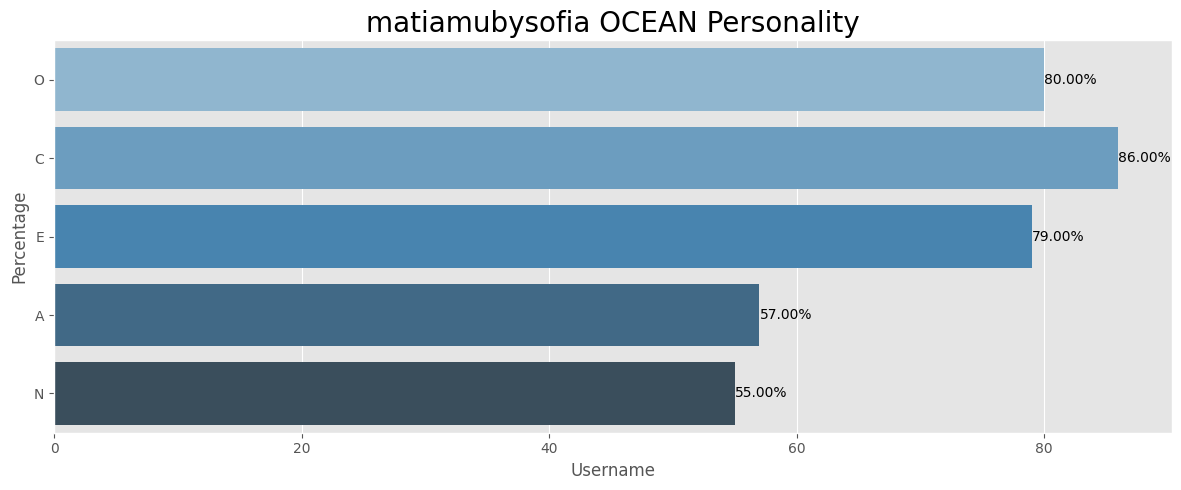

In [ ]:
trait_keys = ['O', 'C', 'E', 'A', 'N']
real_perso = np.squeeze(real_perso)
u = pd.DataFrame([{'username': user, 'A': real_perso[0], 'O': real_perso[1],
                    'C': real_perso[2], 'E': real_perso[3],
                    'N': real_perso[4]}])
u = {
    k:(u[k].values[0] if u[k].values[0] > 5.0 else 5) for k in trait_keys
}
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
sns.barplot(x=list(u.values()), y=list(u.keys()), hue=list(u.keys()), palette="Blues_d", dodge=False, legend=False)
for index, value in enumerate(u.values()):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.xlabel('Username')
plt.ylabel('Percentage')
plt.title(f"{user} OCEAN Personality",fontsize=20)
plt.tight_layout()
plt.show()

$$$$

### Optimal Threshold

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PFA/final_data.csv')
data = data.drop_duplicates(subset='username', keep='first')

columns_order = ['username','post_captions','O', 'C', 'E', 'A','N']
new_column_names = {
    'post_captions': 'captions'
}
data = data[columns_order]
data = data.rename(columns=new_column_names)
data

,username,captions,O,C,E,A,N
0,sofia.sapiens,"['Don’t spoil it for those who haven’t read the whole thing 🤫', 'Scroll past if you won’t stay till the end 👀\n\nBeing lazy is normal and is actua...",0,1,0,1,1
1,matiamubysofia,['From within \nThe within \nAs the without \nMerging \nInto \nThis moment now \n🍯\n\nAll the movement to arrive in this sweet space of openness &...,0,0,0,1,1
2,elliotbfit,['I’ve decided it’s time to do a little cut but not just for fat loss ⤵️ \n\nFor me doing a cut right now is actually more about sorting out bad h...,0,1,0,1,0
3,elliotgarnaut,"['I love celebrating loved ones with good wine, and DR3wines x sthugowines is the perfect pairing. DR3 Cabernet Sauvignon 2021 was the perfect dro...",0,1,1,0,0
4,elliotjamesreay,"['Tweedle Dee…💙 #ad amazonmusic falloutonprime', 'When you know my name is Reay…💔 #singing #reels #explore #ibelievetomysoul #raycharles #tiktokma...",1,0,0,1,0
...,...,...,...,...,...,...,...
530,theanthonyedwards_,"['Been grinding all my life for moments like this. #teambose', 'Just in time. AE1 Low is now available in NBA 2K24! Believe That. \n\n#AE1 #Believ...",0,1,0,0,1
531,mr.6ways,"['It’s okay to weep when life feels overwhelming. Tears are a sign of strength, not weakness. But as you let the emotions flow, remember that this...",0,1,1,1,1
532,anthonygargiula,"['i had to be extra and add some riffs to this one lol 😅 #sing #singing #toosweet #hozier', 'i had the most amazing time in new york city with son...",0,1,1,0,1
533,theanthonyvicino,"['Opportunity or Obstacle is often simply a matter of perspective.', ""We built a 7-figure window washing business in under 12-months.\n\nTo start,...",0,1,0,1,1


In [ ]:
users = data.username.to_list()
print(users)

['sofia.sapiens', 'matiamubysofia', 'elliotbfit', 'elliotgarnaut', 'elliotjamesreay', 'harvelliott', 'mrsbeccaelliott', 'elliotsloan', 'hubermanlab', 'andrewcodesmith', 'awilkinson', 'mengmengduck', 'andrewfreund', 'johntravolta', 'sophievandaniels', 'martinachivasso', 'janniksin', 'andreyrublev', 'mosalah', 'alexandrapark1', 'ryan_f_murphy', 'erika.fairweather', 'mayssaa_ghribi', 'alexlange', 'wroetoshaw', 'artchidiary', 'archieperkins__', 'oliverkahn', 'noahschnapp', 'harrywinks', 'elsiegossage', 'frank', 'jamie_lidell', 'carlnasman', 'senatorformica', 'matt_mcinnis', 'michaelrosen9000', 'sofiaguellaty', 'alexander', 'alex_caves', 'harryholland64', 'harryh0ward', 'joolsoliver', 'emilyhenrywrites', 'humminglion', 'henrygolding', 'maya_henry', 'henryrowleyy', '_sarahmhen', 'sophie_aris', 'sophiejaynemiller', 'sophiemoulds', 'sophieferiani', 'sophiet', 'sophiestanbury', 'soturg', 'thatgirlsophy', 'sophie__church', 'sophiechapman87', 'emily', 'emilydidonato', 'emilycanham', 'emilyanngemm

In [ ]:
import ast
def parse_caption(caption):
      try:
          return ast.literal_eval(caption)
      except (ValueError, SyntaxError):
          return []

In [ ]:
def user_data(user):
      user_df = data[data['username'] == user]

      captions = user_df['captions'].to_list()
      parsed_captions = [parse_caption(caption) for caption in captions][0]
      df = []
      for caption in parsed_captions:
            x =  {k:user_df[k].values[0] for k in user_df.drop('captions',axis=1).columns}
            x['captions'] = caption
            df.append(x)

      user_df = pd.DataFrame(df)
      user_df = user_df[['username','captions','O','C','E','A','N']]
      user_df = user_df[user_df['captions'].notna() & user_df['captions'].apply(lambda x: isinstance(x, str) and x != 'N/A')]
      return user_df

In [ ]:
users_preds = []
for user in tqdm(users[:20]):
    user_df = data[data['username'] == user]
    captions = user_df['captions'].to_list()
    captions = [parse_caption(caption) for caption in captions][0]
    user_perso = user_df[['O', 'C', 'E', 'A', 'N']].values[0]

    real_perso = None
    sims = 0
    for new_sentence in tqdm(captions):
      row,sim,perso = find_most_similar(new_sentence)
      if sim>sims:
        sims = sim
        real_perso = perso

    real_perso = real_perso[0]
    users_preds.append({
        'user':user,
        'O':user_perso[0],
        'C':user_perso[1],
        'E':user_perso[2],
        'A':user_perso[3],
        'N':user_perso[4],
        'O_pred':real_perso[0],
        'C_pred':real_perso[1],
        'E_pred':real_perso[2],
        'A_pred':real_perso[3],
        'N_pred':real_perso[4],
    })

users_preds = pd.DataFrame(users_preds)
users_preds

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

,user,O,C,E,A,N,O_pred,C_pred,E_pred,A_pred,N_pred
0,sofia.sapiens,0,1,0,1,1,70.0,33.0,46.0,6.0,33.0
1,matiamubysofia,0,0,0,1,1,57.0,80.0,86.0,79.0,55.0
2,elliotbfit,0,1,0,1,0,40.0,98.0,1.0,1.0,83.0
3,elliotgarnaut,0,1,1,0,0,0.0,70.0,98.0,4.0,0.0
4,elliotjamesreay,1,0,0,1,0,99.0,91.0,3.0,50.0,0.0
5,harvelliott,0,1,0,1,0,70.0,45.0,20.0,24.0,40.0
6,mrsbeccaelliott,1,0,1,1,0,48.0,44.0,15.0,99.0,13.0
7,elliotsloan,0,1,0,0,0,46.0,27.0,31.0,10.0,84.0
8,hubermanlab,0,1,0,1,0,70.0,45.0,20.0,24.0,40.0
9,andrewcodesmith,0,1,0,0,0,45.0,69.0,26.0,0.0,28.0


In [ ]:
best_results = {}
for trait in ['O', 'C', 'E', 'A', 'N']:
    best_accuracy = 0
    best_threshold = 0
    for threshold in tqdm(range(0, 100)):  # Adjust the range based on your actual prediction values
        accuracy = accuracy_score(data[trait][:20], y_pred)
        y_pred = (users_preds[trait+'_pred'] > threshold).astype(int)
        if accuracy > best_accuracy:
          best_threshold = threshold
          best_accuracy = accuracy
          best_threshold = threshold

    best_results[trait] = {
            'threshold':best_threshold,
            'accuracy':best_accuracy
        }
best_results

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'O': {'threshold': 71, 'accuracy': 0.7},
 'C': {'threshold': 1, 'accuracy': 0.55},
 'E': {'threshold': 95, 'accuracy': 0.7},
 'A': {'threshold': 1, 'accuracy': 0.6},
 'N': {'threshold': 0, 'accuracy': 0.9}}